# DreamWorks Analsyis: The Basics
To begin looking at how gender affects dialogue in these movies let's get some basic stats first. Specifically:
* Token count per line
* Type count per line

How do these vary based on gender? Later on I hope to look at these character by character:
* Token count per character
* Type counter per character
* TTR per character

I'm not doing TTR line by line, because some of these lines are incredibly short, creating huge TTRs. It's best to look at a character's overall TTR

## 1) Token count

In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
dw_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_dreamworks.pkl")

In [4]:
dw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 10 columns):
Gender              6674 non-null object
Movie               6674 non-null object
Role                6674 non-null object
Song                6674 non-null object
Speaker             6674 non-null object
Speaker_Status      6674 non-null object
Text                6674 non-null object
UTTERANCE_NUMBER    6674 non-null int64
Year                6674 non-null int64
Disney_Period       6674 non-null object
dtypes: int64(2), object(8)
memory usage: 312.9+ KB


In [6]:
dw_df["Tokens"] = dw_df.Text.map(nltk.word_tokenize)

In [7]:
dw_df.head()

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens
0,m,Antz,PRO,D,z,NON-P,"all my life, i've lived and worked in the big ...",1,1998,DREAMWORKS,"[all, my, life, ,, i, 've, lived, and, worked,..."
1,m,Antz,PRO,D,z,NON-P,"...which is kind of a problem, since i've alwa...",2,1998,DREAMWORKS,"[..., which, is, kind, of, a, problem, ,, sinc..."
2,m,Antz,PRO,D,z,NON-P,i feel...isolated. different. i've got aband...,3,1998,DREAMWORKS,"[i, feel, ..., isolated, ., different, ., i, '..."
3,m,Antz,N,D,motivational counsellor,NON-P,terrific! you should feel insignificant!,4,1998,DREAMWORKS,"[terrific, !, you, should, feel, insignificant..."
4,m,Antz,PRO,D,z,NON-P,...i should?,5,1998,DREAMWORKS,"[..., i, should, ?]"


In [8]:
dw_df["Types"] = dw_df.Tokens.map(set)

In [9]:
dw_df.head()

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens,Types
0,m,Antz,PRO,D,z,NON-P,"all my life, i've lived and worked in the big ...",1,1998,DREAMWORKS,"[all, my, life, ,, i, 've, lived, and, worked,...","{i, 've, lived, life, city, worked, ..., ,, an..."
1,m,Antz,PRO,D,z,NON-P,"...which is kind of a problem, since i've alwa...",2,1998,DREAMWORKS,"[..., which, is, kind, of, a, problem, ,, sinc...","{i, 've, uncomfortably, crowds, a, kind, probl..."
2,m,Antz,PRO,D,z,NON-P,i feel...isolated. different. i've got aband...,3,1998,DREAMWORKS,"[i, feel, ..., isolated, ., different, ., i, '...","{do, assigned, insignificant, time, just, work..."
3,m,Antz,N,D,motivational counsellor,NON-P,terrific! you should feel insignificant!,4,1998,DREAMWORKS,"[terrific, !, you, should, feel, insignificant...","{!, insignificant, you, feel, terrific, should}"
4,m,Antz,PRO,D,z,NON-P,...i should?,5,1998,DREAMWORKS,"[..., i, should, ?]","{i, ..., should, ?}"


In [10]:
dw_df["Token_Count"] = dw_df.Tokens.map(len)

In [11]:
dw_df["Type_Count"] = dw_df.Types.map(len)

In [13]:
dw_df.head()

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens,Types,Token_Count,Type_Count
0,m,Antz,PRO,D,z,NON-P,"all my life, i've lived and worked in the big ...",1,1998,DREAMWORKS,"[all, my, life, ,, i, 've, lived, and, worked,...","{i, 've, lived, life, city, worked, ..., ,, an...",14,14
1,m,Antz,PRO,D,z,NON-P,"...which is kind of a problem, since i've alwa...",2,1998,DREAMWORKS,"[..., which, is, kind, of, a, problem, ,, sinc...","{i, 've, uncomfortably, crowds, a, kind, probl...",17,17
2,m,Antz,PRO,D,z,NON-P,i feel...isolated. different. i've got aband...,3,1998,DREAMWORKS,"[i, feel, ..., isolated, ., different, ., i, '...","{do, assigned, insignificant, time, just, work...",115,73
3,m,Antz,N,D,motivational counsellor,NON-P,terrific! you should feel insignificant!,4,1998,DREAMWORKS,"[terrific, !, you, should, feel, insignificant...","{!, insignificant, you, feel, terrific, should}",7,6
4,m,Antz,PRO,D,z,NON-P,...i should?,5,1998,DREAMWORKS,"[..., i, should, ?]","{i, ..., should, ?}",4,4


In [14]:
dw_df[["Token_Count", "Type_Count"]].describe()

,Token_Count,Type_Count
count,6674.000000,6674.000000
mean,11.684447,9.932874
std,11.301579,8.124259
min,0.000000,0.000000
25%,5.000000,4.000000
50%,8.000000,8.000000
75%,15.000000,13.000000
max,213.000000,109.000000


Average token count per line is about 11.68, average type count is almost 10. Somewhat large standard deviations

In [15]:
dw_df[dw_df.Token_Count == 0] # definitely more blank lines than there were in Disney data

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens,Types,Token_Count,Type_Count
1743,f,Shrek 3,HELPER,D,snow white,PRINCESS,,378,2007,DREAMWORKS,[],{},0,0
1983,m,Shrek 3,HELPER,D,donkey,NON-P,,618,2007,DREAMWORKS,[],{},0,0
5273,m,The Croods,ANT,D,grug,NON-P,,78,2013,DREAMWORKS,[],{},0,0
5286,n,The Croods,N,D,croods,NON-P,,91,2013,DREAMWORKS,[],{},0,0
5441,n,The Croods,N,D,croods,NON-P,,246,2013,DREAMWORKS,[],{},0,0
5649,n,The Croods,N,D,croods,NON-P,,454,2013,DREAMWORKS,[],{},0,0
6115,m,How to Train Your Dragon 2,PRO,D,hiccup,NON-P,,150,2014,DREAMWORKS,[],{},0,0


In [16]:
dw_df[dw_df.Token_Count == 213] #ay, donkey

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens,Types,Token_Count,Type_Count
941,m,Shrek,HELPER,D,donkey,NON-P,"slow down. slow down, baby, please. i believe ...",298,2001,DREAMWORKS,"[slow, down, ., slow, down, ,, baby, ,, please...","{do, ?, now, just, that, the, my, okay, each, ...",213,102


The large standard deviation could be due to song lyrics being included (though I imagine this affect will be much smaller for this Dreamworks data). Let's create a new dataframe, with just dialogue.

In [17]:
dw_df_dialogue = dw_df[dw_df.Song == 'D']

In [18]:
dw_df_dialogue.reset_index(drop=True, inplace=True)

In [19]:
dw_df_dialogue.head()

,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Disney_Period,Tokens,Types,Token_Count,Type_Count
0,m,Antz,PRO,D,z,NON-P,"all my life, i've lived and worked in the big ...",1,1998,DREAMWORKS,"[all, my, life, ,, i, 've, lived, and, worked,...","{i, 've, lived, life, city, worked, ..., ,, an...",14,14
1,m,Antz,PRO,D,z,NON-P,"...which is kind of a problem, since i've alwa...",2,1998,DREAMWORKS,"[..., which, is, kind, of, a, problem, ,, sinc...","{i, 've, uncomfortably, crowds, a, kind, probl...",17,17
2,m,Antz,PRO,D,z,NON-P,i feel...isolated. different. i've got aband...,3,1998,DREAMWORKS,"[i, feel, ..., isolated, ., different, ., i, '...","{do, assigned, insignificant, time, just, work...",115,73
3,m,Antz,N,D,motivational counsellor,NON-P,terrific! you should feel insignificant!,4,1998,DREAMWORKS,"[terrific, !, you, should, feel, insignificant...","{!, insignificant, you, feel, terrific, should}",7,6
4,m,Antz,PRO,D,z,NON-P,...i should?,5,1998,DREAMWORKS,"[..., i, should, ?]","{i, ..., should, ?}",4,4


In [20]:
print(dw_df.Movie.value_counts()) #lines in each movie w/ songs
print(dw_df_dialogue.Movie.value_counts()) #lines in each movie w/o songs
#only change is in HTTYD2

Rise of the Guardians         928
Shrek 3                       870
The Croods                    770
How to Train Your Dragon      726
Shrek                         722
How to Train Your Dragon 2    708
Kung Fu Panda                 689
Antz                          644
Megamind                      617
Name: Movie, dtype: int64
Rise of the Guardians         928
Shrek 3                       870
The Croods                    770
How to Train Your Dragon      726
Shrek                         722
How to Train Your Dragon 2    697
Kung Fu Panda                 689
Antz                          644
Megamind                      617
Name: Movie, dtype: int64


In [21]:
print(dw_df.Movie.value_counts().describe()) # shows average number of lines in each movie w/ songs
print(dw_df_dialogue.Movie.value_counts().describe()) # shows average number of line in each movie w/o songs

count      9.000000
mean     741.555556
std      101.002613
min      617.000000
25%      689.000000
50%      722.000000
75%      770.000000
max      928.000000
Name: Movie, dtype: float64
count      9.000000
mean     740.333333
std      101.524628
min      617.000000
25%      689.000000
50%      722.000000
75%      770.000000
max      928.000000
Name: Movie, dtype: float64


In [22]:
print(dw_df[["Token_Count", "Type_Count"]].describe()) #token/type counts in song df
print('\n')
print(dw_df_dialogue[["Token_Count", "Type_Count"]].describe()) #token/type counts in dialogue df

       Token_Count   Type_Count
count  6674.000000  6674.000000
mean     11.684447     9.932874
std      11.301579     8.124259
min       0.000000     0.000000
25%       5.000000     4.000000
50%       8.000000     8.000000
75%      15.000000    13.000000
max     213.000000   109.000000


       Token_Count   Type_Count
count  6663.000000  6663.000000
mean     11.673570     9.924508
std      11.296335     8.120389
min       0.000000     0.000000
25%       5.000000     4.000000
50%       8.000000     8.000000
75%      15.000000    13.000000
max     213.000000   109.000000


Now, the average token count is 11.67, and the average type count is 9.9 (basically the same as before). The standard deviations is lower though!

Let's look at the overall stats for each movie!

In [23]:
dw_df.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                  \
                                      count       mean        std  min  25%   
Year Movie                                                                    
1998 Antz                             644.0  14.251553  12.394955  2.0  6.0   
2001 Shrek                            722.0  14.448753  15.970960  1.0  5.0   
2007 Shrek 3                          870.0  10.864368   9.435505  0.0  4.0   
2008 Kung Fu Panda                    689.0  11.121916   9.335616  2.0  5.0   
2010 How to Train Your Dragon         726.0  10.954545   9.551133  2.0  5.0   
     Megamind                         617.0  13.811994  15.617287  2.0  5.0   
2012 Rise of the Guardians            928.0  10.103448   8.596434  2.0  4.0   
2013 The Croods                       770.0   9.719481   9.091030  0.0  4.0   
2014 How to Train Your Dragon 2       708.0  11.189266   9.562024  0.0  5.0   

                                                   Type_Count             \
                                  50%   75%    max      count       mean   
Year Movie                                                                 
1998 Antz                        10.0  18.0  115.0      644.0  11.936335   
2001 Shrek                       10.0  18.0  213.0      722.0  11.533241   
2007 Shrek 3                      8.0  14.0  110.0      870.0   9.508046   
2008 Kung Fu Panda                9.0  15.0   90.0      689.0   9.568940   
2010 How to Train Your Dragon     8.0  14.0   70.0      726.0   9.420110   
     Megamind                    10.0  16.0  192.0      617.0  11.619125   
2012 Rise of the Guardians        8.0  13.0   61.0      928.0   8.690733   
2013 The Croods                   7.0  12.0   90.0      770.0   8.233766   
2014 How to Train Your Dragon 2   8.0  15.0   69.0      708.0   9.887006   

                                                                         
                                       std  min  25%   50%   75%    max  
Year Movie                                                               
1998 Antz                         9.179427  2.0  5.0  10.0  16.0   73.0  
2001 Shrek                       10.139232  1.0  5.0   9.0  15.0  102.0  
2007 Shrek 3                      7.412663  0.0  4.0   8.0  13.0   74.0  
2008 Kung Fu Panda                7.089028  2.0  4.0   8.0  13.0   52.0  
2010 How to Train Your Dragon     7.200849  2.0  5.0   7.0  12.0   49.0  
     Megamind                    10.412553  2.0  5.0   9.0  14.0  109.0  
2012 Rise of the Guardians        6.583153  2.0  4.0   7.0  12.0   41.0  
2013 The Croods                   6.607511  0.0  4.0   6.0  11.0   58.0  
2014 How to Train Your Dragon 2   7.652547  0.0  4.0   8.0  13.0   44.0

Now that we have the overall averages, let's see how these differ depending on certain filters.

## Speaker Gender?

In [24]:
dw_df_dialogue.groupby('Gender', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
             count       mean        std  min  25%  50%   75%    max   
Gender                                                                 
m           5117.0  12.091069  11.769379  0.0  5.0  9.0  15.0  213.0   
f           1318.0  10.400607   9.614928  0.0  4.0  7.5  13.0   97.0   
n            228.0   9.662281   8.331511  0.0  4.0  7.0  13.0   48.0   

       Type_Count                                                   
            count       mean       std  min  25%  50%   75%    max  
Gender                                                              
m          5117.0  10.221810  8.358481  0.0  5.0  8.0  13.0  109.0  
f          1318.0   9.094841  7.304482  0.0  4.0  7.0  12.0   58.0  
n           228.0   8.048246  6.448874  0.0  3.0  6.0  11.0   37.0

Male speakers average 1.5 more tokens than female speakers, and 1 more type than female speakers

# Visualizations

In [25]:
from matplotlib import pyplot as plt

In [27]:
f_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'f']
m_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'm']
f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']

f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]
tok_per_f_by_year = f_tok_by_year / f_in_year

f_type_by_year = f_lines.groupby('Year')["Type_Count"].describe()["mean"]
print(f_tok_by_year)
print(f_type_by_year)

Year
1998    12.520468
2001    12.784615
2007     8.865169
2008    10.611111
2010    10.394619
2012     9.882812
2013     8.920755
2014    10.692308
Name: mean, dtype: float64
Year
1998    10.678363
2001    10.807692
2007     7.977528
2008     9.277778
2010     9.143498
2012     8.765625
2013     7.822642
2014     9.473373
Name: mean, dtype: float64


## Average Token Count per Line in Each Movie by Gender

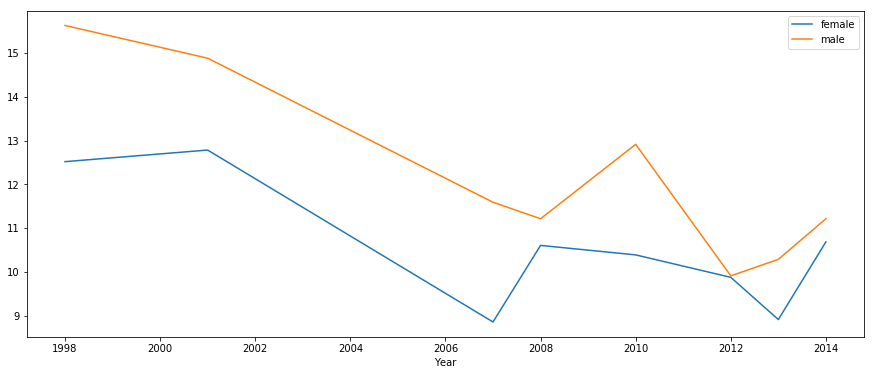

In [28]:
f_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'f']
m_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'm']

f_tok_by_year = f_lines.groupby('Year')["Token_Count"].describe()["mean"]

m_tok_by_year = m_lines.groupby('Year')["Token_Count"].describe()["mean"]  

f_tok_by_year.plot(figsize = (15,6))
m_tok_by_year.plot(figsize = (15,6))
plt.legend(['female', 'male'])
plt.show()                                                                           

Interesting! Overall it seems that overtime lines have gotten shorter, and males always have longer lines than females, but the gap has definitely decreased!

## Average Type Count per Line in Each Movie By Gender

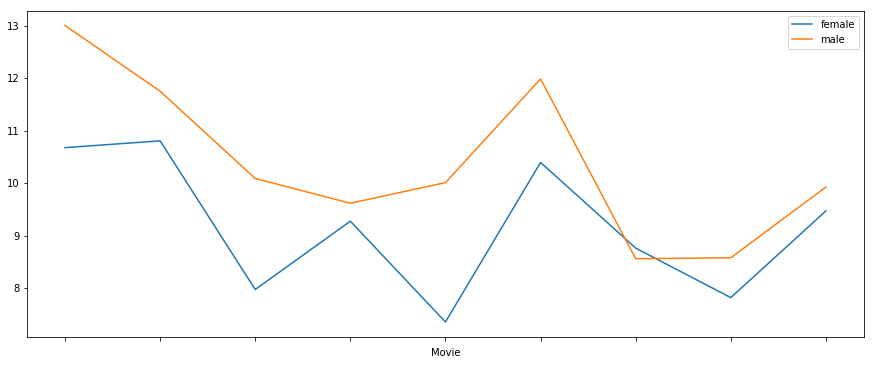

In [29]:
#type counts?
f_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'f']
m_lines = dw_df_dialogue[dw_df_dialogue.Gender == 'm']

f_type_by_year = f_lines.groupby('Movie', sort=False)["Type_Count"].describe()['mean']
m_type_by_year = m_lines.groupby('Movie', sort=False)["Type_Count"].describe()['mean']  

#FIND A WAY TO GET LABELS ON AXES!!!

f_type_by_year.plot(figsize = (15, 6))
m_type_by_year.plot(figsize = (15, 6))
plt.legend(['female', 'male'])
plt.show()

Looks like a similar trend...and in one movie the female speakers actually have higher type counts! I wish I could figure out how to get those dang labels on this graph....

## Average Token Count/Line by Gender in Each Movie

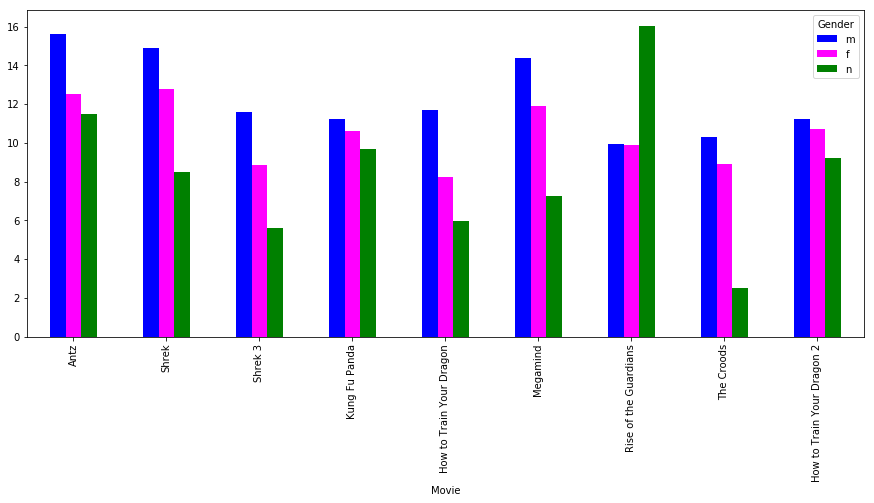

In [32]:
subgroup_2 = dw_df_dialogue.groupby(['Movie','Gender'], sort = False)["Token_Count"].describe()['mean']
subgroup_2.unstack().plot.bar(color=['blue', 'magenta', 'green'], figsize = (15,6))

At first glance, the average token counts between genders aren't nearly as different as they were for some Disney films...

P.S. The graph above of average token count by gender in each film. (A different visualization of the same stats found in the line plots above)

## Average Type Count/Line by Gender in Each Movie

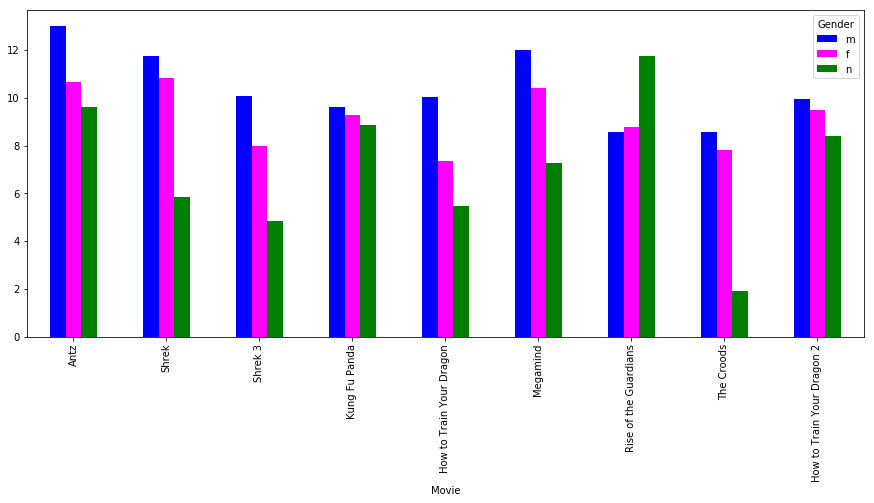

In [33]:
subgroup_3 = dw_df_dialogue.groupby(['Movie','Gender'], sort = False)["Type_Count"].describe()['mean']
subgroup_3.unstack().plot.bar(color = ['blue', 'magenta', 'green'], figsize = (15,6))

The average type count is higher for female speakers in guardians!!

In [34]:
#Seeing number of lines by gender for each movie
#aka, total number of lines per gender in each movie
total_lines_per_gen = dw_df_dialogue.groupby(['Movie'], sort=False)['Gender'].value_counts()
total_lines_per_gen

Movie                       Gender
Antz                        m         387
                            f         171
                            n          86
Shrek                       m         586
                            f         130
                            n           6
Shrek 3                     m         667
                            f         178
                            n          25
Kung Fu Panda               m         613
                            f          54
                            n          22
How to Train Your Dragon    m         593
                            f          92
                            n          41
Megamind                    m         482
                            f         131
                            n           4
Rise of the Guardians       m         771
                            f         128
                            n          29
The Croods                  m         495
                            f         265

In [35]:
#The total number of female/male characters per movie
num_char_per_gen = dw_df_dialogue.groupby(['Movie', 'Gender'], sort=False)["Speaker"].unique().map(len)

In [36]:
num_char_per_gen

Movie                       Gender
Antz                        m         13
                            f          7
                            n         36
Shrek                       m         28
                            f          3
                            n          5
Shrek 3                     m         34
                            f         19
                            n         17
Kung Fu Panda               n          8
                            m         16
                            f          6
How to Train Your Dragon    m         11
                            n         13
                            f          3
Megamind                    m          9
                            n          3
                            f          2
Rise of the Guardians       m         14
                            f         10
                            n          4
The Croods                  f          4
                            m          5
                      

In [37]:
#total number of lines / total number of characters
avg_lines_per_gen = total_lines_per_gen.divide(num_char_per_gen)
# This returns movies in alphabetical order, not chronological order. Need to reindex

In [38]:
avg_lines_per_gen = avg_lines_per_gen.reindex(index = total_lines_per_gen.index)
avg_lines_per_gen

Movie                       Gender
Antz                        m         29.769231
                            f         24.428571
                            n          2.388889
Shrek                       m         20.928571
                            f         43.333333
                            n          1.200000
Shrek 3                     m         19.617647
                            f          9.368421
                            n          1.470588
Kung Fu Panda               m         38.312500
                            f          9.000000
                            n          2.750000
How to Train Your Dragon    m         53.909091
                            f         30.666667
                            n          3.153846
Megamind                    m         53.555556
                            f         65.500000
                            n          1.333333
Rise of the Guardians       m         55.071429
                            f         12.800000
     

## Total Lines per Gender in Each Movie

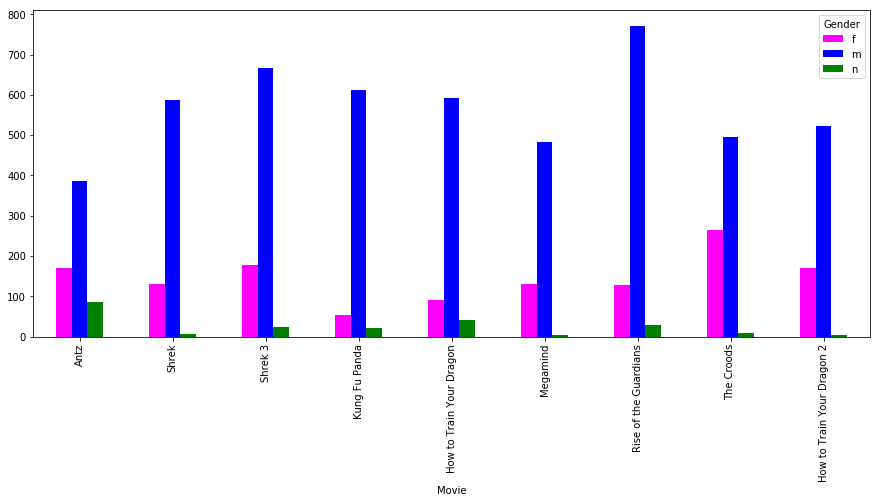

In [39]:
total_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15, 6))

Wow, a MUCH bigger overall difference in Dreamworks than in Disney

## Average Number of Lines per Gender in Each Movie
Here, I divide the total number of lines per gender by the number of male and female characters in each movie, to get the average number of lines uttered by men and women in each movie

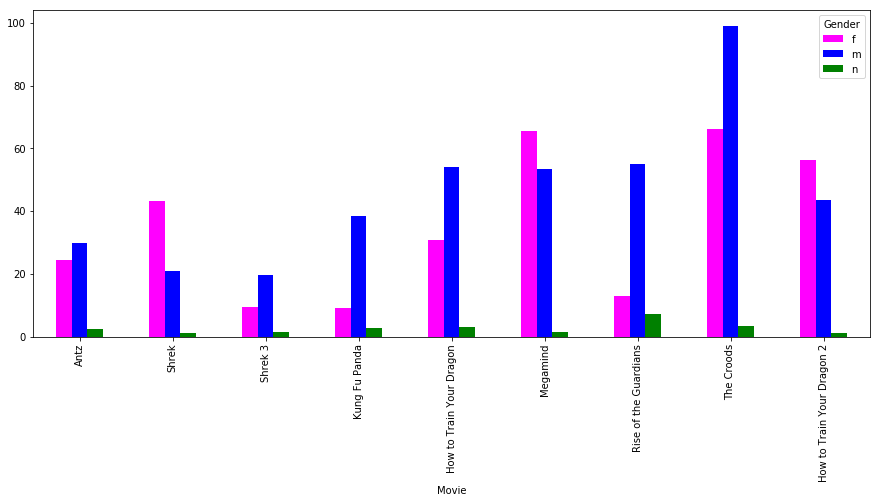

In [40]:
### Oh...interesting....
avg_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize=(15,6))

When you take the number of male and female characters into account, you find that for a few Dreamworks movies, on average female characters tend to have more lines. This makes sense for movies like Shrek and HTTYD, which have one main female character with a lot of lines. Rise of the guardians, on the other hand, consists of several minor female characters.